In [2]:
# Import basic libraries
from palmerpenguins import load_penguins
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import time
from sklearn.preprocessing import LabelEncoder
import os 
import time
os.chdir("/Users/hoangthuyduongvu/Desktop/FuzzSIM")
from itertools import product
from matplotlib import cm



In [4]:
# Import personalized libraries
from fuzz.src.capacity import *
from fuzz.choquet.choquet import *
from fuzz.src.norm import *
from fuzz.src.knn import KNNFuzz
from fuzz.src.sim import S1, S2, S3
from fuzz.optim import *
from fuzz.utils import *
from fuzz.eval import leave_one_out
from fuzz.dataloader import *
from fuzz.choquet.d_choquet import *

In [5]:
iris_data = load_iris()
iris = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
iris['target'] = iris_data.target
iris 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
data, labels = iris.iloc[:, :-1].values, iris.iloc[:, -1].values
data = batch_norm(np.array(data, dtype=np.float32))
data

array([[1.        , 0.67346936, 0.24489795, 0.        ],
       [1.        , 0.59574461, 0.25531912, 0.        ],
       [1.        , 0.66666669, 0.24444443, 0.        ],
       [1.        , 0.65909088, 0.29545453, 0.        ],
       [1.        , 0.70833325, 0.24999997, 0.        ],
       [1.        , 0.69999999, 0.26000002, 0.        ],
       [1.        , 0.72093034, 0.25581396, 0.        ],
       [1.        , 0.66666663, 0.27083331, 0.        ],
       [1.        , 0.64285713, 0.28571424, 0.        ],
       [1.        , 0.625     , 0.29166666, 0.        ],
       [1.        , 0.67307687, 0.24999997, 0.        ],
       [1.        , 0.69565213, 0.30434778, 0.        ],
       [1.        , 0.61702126, 0.27659571, 0.        ],
       [1.        , 0.69047618, 0.23809522, 0.        ],
       [1.        , 0.6785714 , 0.17857142, 0.        ],
       [1.        , 0.75471699, 0.20754719, 0.        ],
       [1.        , 0.69999999, 0.17999999, 0.        ],
       [1.        , 0.66666675,

In [ ]:
# Simplified version - main improvements
from itertools import product

nb_loop = 10
p_values = list(range(nb_loop))
q_values = list(range(1, nb_loop+1))
k_values = list(range(1, nb_loop+1))

print("p:", p_values)
print("q:", q_values)

# Single loop using itertools.product instead of nested loops
results = []
for p_val, q_val in product(p_values, q_values):
    # Generate mu once per (p,q) pair - moved outside k loop
    mu = generate_capacity(enumerate_permute_unit(data[0]))
    
    # Vectorized k loop
    k_results = []
    for k in k_values:
        classifier = KNNFuzz(
            input_dimension=data.shape[1], 
            mu=mu, 
            k=k, 
            sim=S1, 
            choquet_version='d_choquet', 
            p=p_val, 
            q=q_val
        )
        res = leave_one_out(C=classifier, DS=(data, labels))
        k_results.append(res)
    print(np.array(k_results).shape)
    
    results.append(k_results)
    print(f"p: {p_val}, q: {q_val}, final_res: {res}")

p: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
q: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
(10,)
p: 0, q: 1, final_res: 0.0
(10,)
p: 0, q: 2, final_res: 0.0
(10,)
p: 0, q: 3, final_res: 0.0
(10,)
p: 0, q: 4, final_res: 0.0
(10,)
p: 0, q: 5, final_res: 0.0
(10,)
p: 0, q: 6, final_res: 0.0
(10,)
p: 0, q: 7, final_res: 0.0
(10,)
p: 0, q: 8, final_res: 0.0
(10,)
p: 0, q: 9, final_res: 0.0
(10,)
p: 0, q: 10, final_res: 0.0
(10,)
p: 1, q: 1, final_res: 0.6666666666666666
(10,)
p: 1, q: 2, final_res: 0.7533333333333333
(10,)
p: 1, q: 3, final_res: 0.8266666666666667
(10,)
p: 1, q: 4, final_res: 0.6533333333333333
(10,)
p: 1, q: 5, final_res: 0.4666666666666667
(10,)
p: 1, q: 6, final_res: 0.18
(10,)
p: 1, q: 7, final_res: 0.24666666666666667
(10,)
p: 1, q: 8, final_res: 0.32
(10,)
p: 1, q: 9, final_res: 0.11333333333333333
(10,)
p: 1, q: 10, final_res: 0.16
(10,)
p: 2, q: 1, final_res: 0.46
(10,)
p: 2, q: 2, final_res: 0.66
(10,)
p: 2, q: 3, final_res: 0.6733333333333333
(10,)
p: 2, q: 4, final_res: 0.713333333333

Results shape: (10, 10, 10)
Reshaped results: (10, 10, 10)
Z_mean shape: (10, 10)
X shape: (10,)
Y shape: (10,)
X_mesh shape after meshgrid: (10, 10)
Y_mesh shape after meshgrid: (10, 10)
Z_plot shape: (10, 10)
Shapes - X_mesh: (10, 10), Y_mesh: (10, 10), Z_plot: (10, 10)


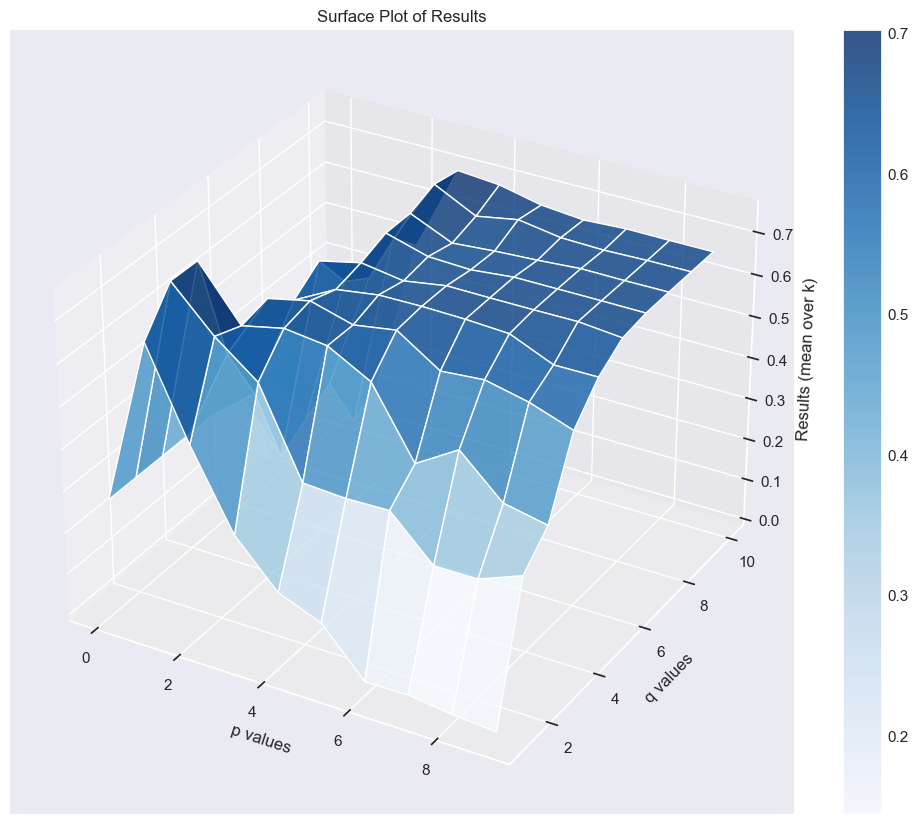

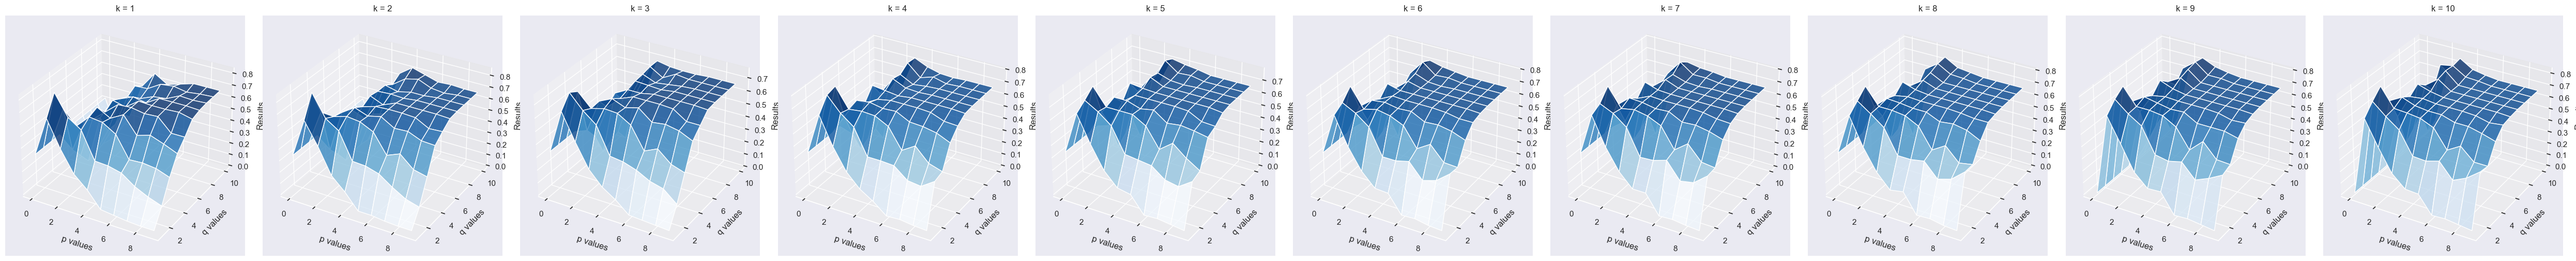


Debug Information:
p_values length: 10
q_values length: 10
k_values length: 10
Total combinations: 100
Results original shape: (10, 10, 10)
Meshgrid shapes: X=(10, 10), Y=(10, 10)


In [ ]:
# Convert to numpy array and reshape properly
results = np.array(results)  # Shape: (len(p_values)*len(q_values), len(k_values))
print(f"Results shape: {results.shape}")

# Reshape to (len(p_values), len(q_values), len(k_values))
results = results.reshape(len(p_values), len(q_values), len(k_values))
print(f"Reshaped results: {results.shape}")

# For surface plotting, you need to decide how to handle the k dimension
# Option 1: Use mean across k values
Z_mean = np.mean(results, axis=2)  # Average over k dimension
print(f"Z_mean shape: {Z_mean.shape}")

# Option 2: Use max across k values
Z_max = np.max(results, axis=2)

# Option 3: Use a specific k value (e.g., k=1, which is index 0)
Z_k1 = results[:, :, 0]

plt.style.use('_mpl-gallery')

# Make meshgrid - note the order!
X = np.array(p_values)
Y = np.array(q_values)
print("X shape:", X.shape)
print("Y shape:", Y.shape)

# Create meshgrid
X_mesh, Y_mesh = np.meshgrid(X, Y, indexing='xy')
print("X_mesh shape after meshgrid:", X_mesh.shape)
print("Y_mesh shape after meshgrid:", Y_mesh.shape)

# Transpose Z to match meshgrid dimensions
Z_plot = Z_mean.T  # Transpose to match meshgrid shape
print(f"Z_plot shape: {Z_plot.shape}")

# Verify shapes match
print(f"Shapes - X_mesh: {X_mesh.shape}, Y_mesh: {Y_mesh.shape}, Z_plot: {Z_plot.shape}")

# Plot the surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 8))
surf = ax.plot_surface(X_mesh, Y_mesh, Z_plot, cmap=cm.Blues, alpha=0.8)

# Add labels
ax.set_xlabel('p values')
ax.set_ylabel('q values')
ax.set_zlabel('Results (mean over k)')
ax.set_title('Surface Plot of Results')

# Add colorbar
fig.colorbar(surf)

plt.show()

# Alternative: Plot multiple surfaces for different k values
fig, axes = plt.subplots(1, len(k_values), subplot_kw={"projection": "3d"}, 
                        figsize=(5*len(k_values), 5))

if len(k_values) == 1:
    axes = [axes]

for i, k_val in enumerate(k_values):
    Z_k = results[:, :, i].T  # Transpose for each k
    surf = axes[i].plot_surface(X_mesh, Y_mesh, Z_k, cmap=cm.Blues, alpha=0.8)
    axes[i].set_title(f'k = {k_val}')
    axes[i].set_xlabel('p values')
    axes[i].set_ylabel('q values')
    axes[i].set_zlabel('Results')

plt.tight_layout()
plt.show()

# Debug information
print("\nDebug Information:")
print(f"p_values length: {len(p_values)}")
print(f"q_values length: {len(q_values)}")
print(f"k_values length: {len(k_values)}")
print(f"Total combinations: {len(p_values) * len(q_values)}")
print(f"Results original shape: {np.array(results).shape}")
print(f"Meshgrid shapes: X={X_mesh.shape}, Y={Y_mesh.shape}")